In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from FS.pso import jfs   # change this to switch algorithm 

In [4]:
from scipy.io import arff
arff_file = arff.loadarff('archive/CM1.arff')

In [5]:
# load data
data  = pd.DataFrame(arff_file[0])

In [6]:
data.head()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,9.0,5.0,3.0,2.0,2.0,8.0,3.0,0.16,4.0,2.0,...,10.0,0.10,36.0,66.0,21.0,17.0,31.0,19.05,19.0,b'N'
1,19.0,3.0,1.0,2.0,0.0,4.0,2.0,0.06,2.0,2.0,...,23.0,0.04,66.0,69.0,34.0,12.0,55.0,5.71,35.0,b'N'
2,0.0,9.0,0.0,0.0,0.0,10.0,5.0,0.56,2.0,5.0,...,9.0,0.50,10.0,21.0,7.0,9.0,10.0,0.00,9.0,b'N'
3,2.0,15.0,2.0,1.0,9.0,24.0,8.0,0.19,10.0,2.4,...,18.0,0.15,67.0,120.0,43.0,19.0,54.0,19.61,42.0,b'N'
4,5.0,5.0,1.0,0.0,0.0,8.0,3.0,0.15,4.0,2.0,...,9.0,0.12,25.0,46.0,17.0,14.0,26.0,0.00,20.0,b'N'


In [7]:
# number of attack labels 
data['Defective'].value_counts()

b'N'    285
b'Y'     42
Name: Defective, dtype: int64

In [8]:
def change_label(df):
  df.Defective.replace([b'N'],'NO',inplace=True)
  df.Defective.replace([b'Y'],'YES',inplace=True)

In [9]:
change_label(data)

In [10]:
# distribution of attack classes
data.Defective.value_counts()

NO     285
YES     42
Name: Defective, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LOC_BLANK                        327 non-null    float64
 1   BRANCH_COUNT                     327 non-null    float64
 2   CALL_PAIRS                       327 non-null    float64
 3   LOC_CODE_AND_COMMENT             327 non-null    float64
 4   LOC_COMMENTS                     327 non-null    float64
 5   CONDITION_COUNT                  327 non-null    float64
 6   CYCLOMATIC_COMPLEXITY            327 non-null    float64
 7   CYCLOMATIC_DENSITY               327 non-null    float64
 8   DECISION_COUNT                   327 non-null    float64
 9   DECISION_DENSITY                 327 non-null    float64
 10  DESIGN_COMPLEXITY                327 non-null    float64
 11  DESIGN_DENSITY                   327 non-null    float64
 12  EDGE_COUNT            

In [12]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['Defective']= label_encoder.fit_transform(data['Defective'])

data['Defective'].unique()

array([0, 1])

In [13]:
X = data.drop(["Defective"],axis =1)
y = data["Defective"]

In [14]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_oversampled, y_oversampled = sm.fit_resample(X, y)

In [15]:
X_smt = pd.DataFrame(X_oversampled, columns=X.columns)

In [16]:
X_smt.shape

(570, 37)

In [17]:
y_oversampled.shape

(570,)

In [18]:
X = X_smt.values

In [19]:
y = y_oversampled.values

In [20]:
feat  = np.asarray(X)
label = np.asarray(y)

In [21]:
# split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3, stratify=label)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

In [22]:
# parameter
k    = 5     # k-value
N    = 5    # number of particles
T    = 5   # maximum number of iterations
opts = {'k':k, 'fold':fold, 'N':N, 'T':T}

# perform feature selection
fmdl = jfs(feat, label, opts)
sf   = fmdl['sf']

Iteration: 1
Best (PSO): 0.1893172119487909
Iteration: 2
Best (PSO): 0.1893172119487909
Iteration: 3
Best (PSO): 0.18904694167852062
Iteration: 4
Best (PSO): 0.18877667140825033
Iteration: 5
Best (PSO): 0.18325746799431017


In [23]:
data.columns

Index(['LOC_BLANK', 'BRANCH_COUNT', 'CALL_PAIRS', 'LOC_CODE_AND_COMMENT',
       'LOC_COMMENTS', 'CONDITION_COUNT', 'CYCLOMATIC_COMPLEXITY',
       'CYCLOMATIC_DENSITY', 'DECISION_COUNT', 'DECISION_DENSITY',
       'DESIGN_COMPLEXITY', 'DESIGN_DENSITY', 'EDGE_COUNT',
       'ESSENTIAL_COMPLEXITY', 'ESSENTIAL_DENSITY', 'LOC_EXECUTABLE',
       'PARAMETER_COUNT', 'HALSTEAD_CONTENT', 'HALSTEAD_DIFFICULTY',
       'HALSTEAD_EFFORT', 'HALSTEAD_ERROR_EST', 'HALSTEAD_LENGTH',
       'HALSTEAD_LEVEL', 'HALSTEAD_PROG_TIME', 'HALSTEAD_VOLUME',
       'MAINTENANCE_SEVERITY', 'MODIFIED_CONDITION_COUNT',
       'MULTIPLE_CONDITION_COUNT', 'NODE_COUNT',
       'NORMALIZED_CYLOMATIC_COMPLEXITY', 'NUM_OPERANDS', 'NUM_OPERATORS',
       'NUM_UNIQUE_OPERANDS', 'NUM_UNIQUE_OPERATORS', 'NUMBER_OF_LINES',
       'PERCENT_COMMENTS', 'LOC_TOTAL', 'Defective'],
      dtype='object')

In [24]:
sf

array([ 2, 10, 11, 12, 16, 17, 20, 25, 28, 29, 30, 32, 33, 34])

In [25]:
# model with selected features
num_train = np.size(xtrain, 0)
num_valid = np.size(xtest, 0)

In [26]:
x_train   = xtrain[:, sf]

In [27]:
x_train   = xtrain[:, sf]
y_train   = ytrain.reshape(num_train)  # Solve bug
x_valid   = xtest[:, sf]
y_valid   = ytest.reshape(num_valid)  # Solve bug

In [28]:
# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)

Feature Size: 14


In [29]:
X_fea = pd.DataFrame(x_train)
y_fea = pd.DataFrame(y_train)

In [30]:
result = pd.concat([X_fea, y_fea], axis=1, join='inner')

In [31]:
result.to_csv('cm1_processed.csv')

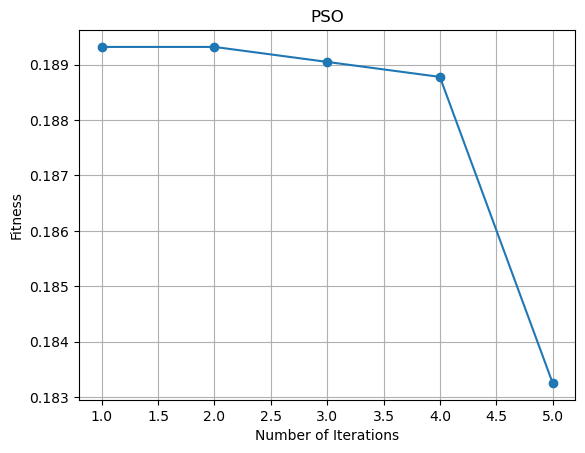

In [32]:
# plot convergence
curve   = fmdl['c']
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, opts['T'], 1.0) + 1.0

fig, ax = plt.subplots()
ax.plot(x, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fitness')
ax.set_title('PSO')
ax.grid()
plt.show()

In [33]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []
auc = []
spec = []
sens = []


#function to call for storing the results
def storeResults(model, a,b,c,d,e,f,g):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))
    auc.append(round(e,3))
    spec.append(round(f,3))
    sens.append(round(g,3))

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.metrics import specificity_score,sensitivity_score

# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_pred    = rf.predict(x_valid)

rf_acc = accuracy_score(y_pred, y_valid)
rf_prec = precision_score(y_pred, y_valid,average='weighted')
rf_rec = recall_score(y_pred, y_valid,average='weighted')
rf_f1 = f1_score(y_pred, y_valid,average='weighted')
rf_auroc = roc_auc_score(y_train, rf.predict_proba(x_train)[:, 1])
rf_spec = specificity_score(y_valid, y_pred, average='weighted')
rf_sens = sensitivity_score(y_valid, y_pred, average='weighted')

In [64]:
storeResults('Random Forest',rf_acc,rf_prec,rf_rec,rf_f1,rf_auroc,rf_spec,rf_sens)

# SVM

In [37]:
from sklearn.svm import SVC
svm = SVC(probability=True)
svm.fit(x_train, y_train)

y_pred    = svm.predict(x_valid)

svm_acc = accuracy_score(y_pred, y_valid)
svm_prec = precision_score(y_pred, y_valid,average='weighted')
svm_rec = recall_score(y_pred, y_valid,average='weighted')
svm_f1 = f1_score(y_pred, y_valid,average='weighted')
svm_auroc = roc_auc_score(y_train, svm.predict_proba(x_train)[:, 1])
svm_spec = specificity_score(y_valid, y_pred, average='weighted')
svm_sens = sensitivity_score(y_valid, y_pred, average='weighted')

In [65]:
storeResults('Support Vector Machine',svm_acc,svm_prec,svm_rec,svm_f1,svm_auroc,svm_spec,svm_sens)

# Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
lr = GaussianNB()
lr.fit(x_train, y_train)

y_pred    = lr.predict(x_valid)

lr_acc = accuracy_score(y_pred, y_valid)
lr_prec = precision_score(y_pred, y_valid,average='weighted')
lr_rec = recall_score(y_pred, y_valid,average='weighted')
lr_f1 = f1_score(y_pred, y_valid,average='weighted')
lr_auroc = roc_auc_score(y_train, lr.predict_proba(x_train)[:, 1])
lr_spec = specificity_score(y_valid, y_pred, average='weighted')
lr_sens = sensitivity_score(y_valid, y_pred, average='weighted')

In [66]:
storeResults('NaiveBayes',lr_acc,lr_prec,lr_rec,lr_f1,lr_auroc,lr_spec,lr_sens)

# ANN-MLP

In [43]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1)
mlp.fit(x_train, y_train)

y_pred    = mlp.predict(x_valid)

mlp_acc = accuracy_score(y_pred, y_valid)
mlp_prec = precision_score(y_pred, y_valid,average='weighted')
mlp_rec = recall_score(y_pred, y_valid,average='weighted')
mlp_f1 = f1_score(y_pred, y_valid,average='weighted')
mlp_auroc = roc_auc_score(y_train, mlp.predict_proba(x_train)[:, 1])
mlp_spec = specificity_score(y_valid, y_pred, average='weighted')
mlp_sens = sensitivity_score(y_valid, y_pred, average='weighted')

In [67]:
storeResults('MLP Classifier',mlp_acc,mlp_prec,mlp_rec,mlp_f1,mlp_auroc,mlp_spec,mlp_sens)

# Adaptive Voting Classifier

In [69]:
from sklearn.ensemble import VotingClassifier
clf = VotingClassifier(estimators=[('RF', rf), ('NB', lr), ('ANN', mlp), ('svm', svm)], voting='soft')

clf.fit(x_train, y_train)

y_pred    = clf.predict(x_valid)

vot_acc = accuracy_score(y_pred, y_valid)
vot_prec = precision_score(y_pred, y_valid,average='weighted')
vot_rec = recall_score(y_pred, y_valid,average='weighted')
vot_f1 = f1_score(y_pred, y_valid,average='weighted')
vot_auroc = roc_auc_score(y_train, clf.predict_proba(x_train)[:, 1])
vot_spec = specificity_score(y_valid, y_pred, average='weighted')
vot_sens = sensitivity_score(y_valid, y_pred, average='weighted')

In [70]:
storeResults('Adaptive Voting Classifier',vot_acc,vot_prec,vot_rec,vot_f1,vot_auroc,vot_spec,vot_sens)

# Stacking CLassifier

In [14]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

tree = DecisionTreeClassifier(random_state = 0)

estimators = [('rf', rf),('dt', tree)]

eclf1 = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_estimators=100))

eclf1.fit(x_train, y_train)

y_pred    = eclf1.predict(x_valid)

stac_acc = (accuracy_score(y_pred, y_valid))
stac_prec = precision_score(y_pred, y_valid,average='weighted')
stac_rec = recall_score(y_pred, y_valid,average='weighted')
stac_f1 = f1_score(y_pred, y_valid,average='weighted')
stac_auroc = roc_auc_score(y_train, eclf1.predict_proba(x_train)[:, 1])
stac_spec = specificity_score(y_valid, y_pred, average='weighted')
stac_sens = sensitivity_score(y_valid, y_pred, average='weighted')

[LightGBM] [Info] Number of positive: 39, number of negative: 41
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.487500 -> initscore=-0.050010
[LightGBM] [Info] Start training from score -0.050010
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [71]:
storeResults('Stacking Classifier',stac_acc,stac_prec,stac_rec,stac_f1,stac_auroc,stac_spec,stac_sens)

# Comparison

In [72]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall, 
                       'F1_score' : f1score,
                       'AUC Score' : auc,
                       'Specificity' : spec,
                       'Sensitivity' : sens
                        
                      }) 

In [73]:
result

,ML Model,Accuracy,Precision,Recall,F1_score,AUC Score,Specificity,Sensitivity
0,Random Forest,0.918,0.921,0.918,0.918,1.000,0.918,0.918
1,Support Vector Machine,0.713,0.719,0.713,0.714,0.833,0.714,0.713
2,NaiveBayes,0.719,0.765,0.719,0.726,0.783,0.721,0.719
3,MLP Classifier,0.860,0.867,0.860,0.860,0.961,0.859,0.860
4,Adaptive Voting Classifier,0.865,0.866,0.865,0.866,0.971,0.865,0.865
5,Stacking Classifier,0.924,0.924,0.924,0.924,1.000,0.924,0.924


# Graph

In [74]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

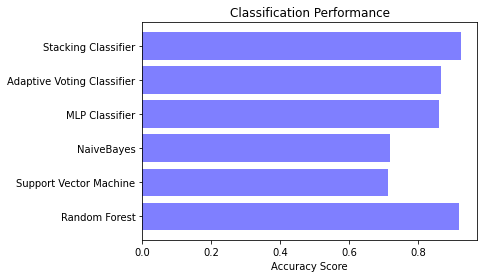

In [75]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

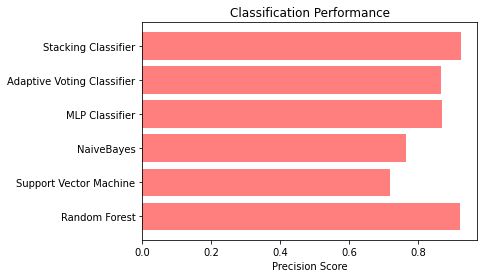

In [76]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

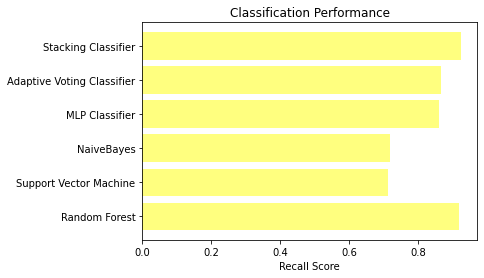

In [77]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

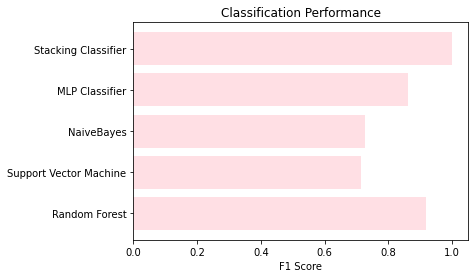

In [56]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# AUC Score

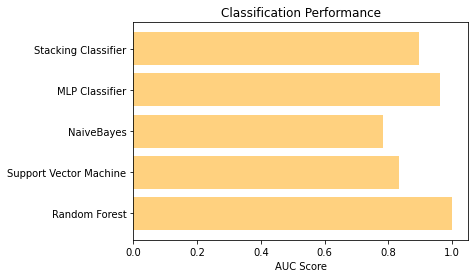

In [57]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, auc, align='center', alpha=0.5,color='orange')
plt2.yticks(y_pos, classifier)
plt2.xlabel('AUC Score')
plt2.title('Classification Performance')
plt2.show()

# Specificity

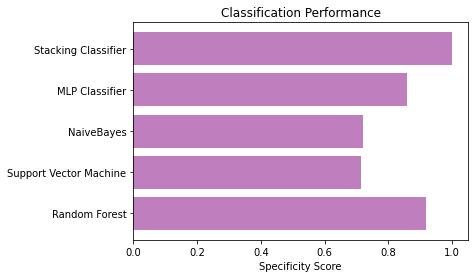

In [58]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, spec, align='center', alpha=0.5,color='purple')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Specificity Score')
plt2.title('Classification Performance')
plt2.show()

# Senseitivity

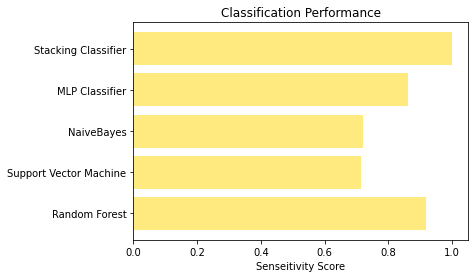

In [59]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, sens, align='center', alpha=0.5,color='gold')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Senseitivity Score')
plt2.title('Classification Performance')
plt2.show()

# Modelling

In [16]:
import joblib
filename = 'model_cm1.sav'
joblib.dump(eclf1, filename)

['model_cm1.sav']